### How to Code a Fourier Series to Match a Known Dataset

### What is a Fourier Series?

A Fourier Series is a way to represent any periodic function in terms of sine and cosine by using an infinite sum of a combination of sines and cosines.

Reference = (http://mathworld.wolfram.com/FourierSeries.html)


### Equation for a Fourier Series

If the function $f(t)$ depends on time and $T$ is ther period, then...

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(\frac{2 \pi n}{T} t) + \sum_{n=1}^{\infty} b_n \sin(\frac{2 \pi n}{T} t)
$$

The constants $a_0$, $a_n$, and $b_n$ are found by integrating the functions below...

$$a_0 = \frac{2}{T} \int_{-T/2}^{T/2} f(t)dt$$


$$a_n = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \cos(\frac{2 \pi n}{T} t) dt $$


$$b_n = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \sin(\frac{2 \pi n}{T} t) dt $$

    
  Reference = (Beyer, Special Functions, Standard Mathematical Tables and Formulae, 29th Ed., CRC Press, 1991, p.403-405)


### Importing Packages

It is a good idea to import all packages that will be used at the beginning to have them all in one spot so you can keep track of them.

Four common packages used when coding with Python are:

   1. `numpy` for fast numerical methods and arrays.
   2. `matplotlib.pyplot` for graphing simulated and measured data.
   3. `pandas` for data processing.
   4. `scipy.optimize curve_fit` for curve fitting data.

To use a package in Python, you have to first import it. When you import a package, programmers use common language to reference the package by. However, you can use almost any words to reference a package if you would like to.

When the `curve_fit` function is called upon, it returns the constants of the bes-fit curve. the function takes the arguments: 
    `curve_fit(name of the defined function, dependant variable, independent variable)`



In [1]:
# import all packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

### Read in Dataset

To read in the dataset (which should be in a text file format), we want to use the pandas function `pd.read_table("datafilehere.txt')` and set it equal variable (the variable name can be whatever you would like it to be).

After reading in the dataset, we can then use the function `chosen_variable_name.head()` to see the columns, rows, and column names of the first five rows. (This will be useful in the next step)

In [2]:
# read in dataset
dataset = pd.read_table('dataset.txt')
dataset.head()

,t (s),V (volts)
0,0.000000,0.00000
1,0.000005,0.02044
2,0.000010,0.04088
3,0.000015,0.06130
4,0.000020,0.08171


### Give the colums of your dataset variable names

You want to extract the two (or more) columns from your dataset separately so that you have your independent variable and dependent variable separate and can use them to complete calculations on, plot them, etc...

To extract your columns, use the function with your variable containing your dataset an set it equal to a column variable name
`Chosen_column_variable = variable_containing_dataset['name of column']`

You will want to use the above function for both of your columns.

Additionally, as a side note, the name of the column in the brackets must be exact column name that is in the text file.

In [3]:
# give columns of dataset variable names
time = dataset['t (s)']
voltage = dataset['V (volts)']

### Plot the Raw Data

It is a good idea to plot the raw data before going any further just to make sure you have all of your data read in correctly and the see what the graph of the raw data looks like.

the function `%matplotlib notebook` is not a necessity but it is helpful because it will allow you to zoom in on your graph to see finer details that you would not normally be able to see in a normal graph.

In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


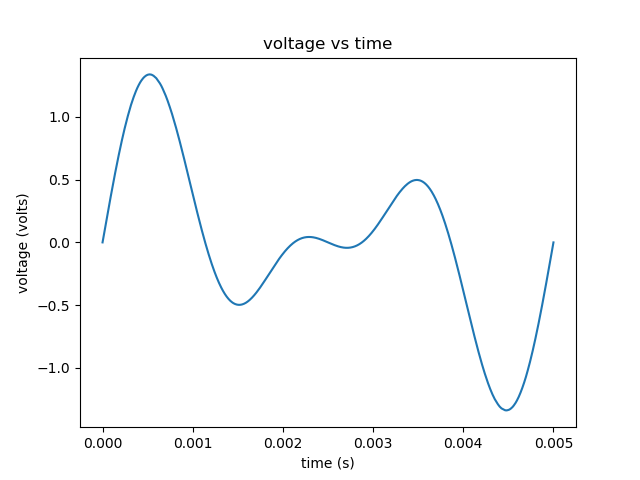

In [5]:
# plot original data
plt.figure()
plt.title('voltage vs time')
plt.xlabel('time (s)')
plt.ylabel('voltage (volts)')
plt.plot(time, voltage)
plt.show()

### The next step is to define our function

The equation of our dataset is $v(t) = b_1 \sin(wt) + b_2 \sin(2wt) + b_3 \sin(3wt) + b_4 \sin(4wt)$ where voltage is a function of time. 

Instead of calculating the integrals (as shown previously) to find the coefficients $b_n$, we are going to define a function that we can use the curve_fit function on the find the coefficients for us. And as you can see, we will only need to calculate the $b_n$ coefficients an not the $a_0$ or the $a_n$ coeffients.

To define our function we will need to send in out 6 arguments so that it can help the curve_fit function calculate the 4 coefficients and $\omega$.

In [6]:
# define function for the data
def voltfunc (t, w, b1, b2, b3, b4):
    voltage2 = b1*np.sin(w*t) + b2*np.sin(2*w*t) + b3*np.sin(3*w*t) + b4*np.sin(4*w*t)
    return voltage2


### Calling on the curve_fit function read in from scipy.optimize

To call on the curve_fit function we need to create two variables, one is usally called `parameters` and the other usually called `test`, however you can name them whatever you would like. Additionally you will not need the `test` variable later, just the `parameters` variable. We then neet to set the two variables equal to the curve fit function as follows...
    `parameters, test = curve_fit(name_of_function_created, independent_variable, dependent_variable)`

It is a good idea to print your parameters so that you can see them and make sure that you have the correct number of parameters and make sure that the numbers look reasonable.

In [7]:
parameters, test = curve_fit(voltfunc, time, voltage)
print(parameters)

[ 42.8733027   -0.51550367 -35.575392   -11.81927176  27.63473203]


### Creating the Fourier Series model data using our function we created and the parameters calculated

Now that we have defined our function and have calculated our parameters for our function, we can then use them to create the model Fourier Series data as follows...
    `model_data_variable = name_of_function_created(independent_variable, *parameters)`

The above line of code sends the independent variable, in addition to all of the parameters calculated, to the function we created so that we can abtain a recreation of the raw data.

In [8]:
model = voltfunc(time, *parameters)

### Plot the raw data with the Fourier Series data to see if they match

We can now plot the raw data with the Fourier Series data to verify that the Fourier Series data and its calculated parameters are correct. If the data overlay one another they we are finished. If the Fourier Series data does not overlay the raw data then we will need to try something additional to get it to match.

<IPython.core.display.Javascript object>


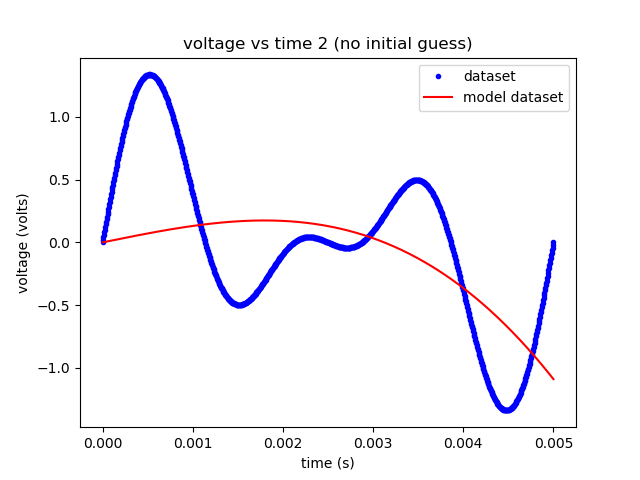

In [9]:
plt.figure()
plt.title('voltage vs time 2 (no initial guess)')
plt.xlabel('time (s)')
plt.ylabel('voltage (volts)')
plt.plot(time, voltage,'b.', label = 'dataset')
plt.plot(time, model,'r-', label = 'model dataset')
plt.legend()
plt.show()

### What do we do now that the Fourier Series Data does not match the raw data?

In the above graph, we can see that the model data (red) does not overlay the raw data (blue).
One thing we can try to make the data match better is to give the `curve_fit` function an "initial guess". The `curve_fit` function has a underlying initial guess of 1 for all of the coefficients/variables we are trying to find, however if any of our coefficients/variables are nowhere close to 1, then it can cause our model data to not match the raw data.

To give the `curve_fit` function an initial guess, we need to give it an initial guess for all coefficient/variables we are trying to calculate as follows..
`p0 = [initial_guess_for_first_coefficient, initial_guess_for_second_coefficient, etc...]`

To use our initial guess, we will add p0 into our previously written line of code as follows...
`parameters, test = curve_fit(name_of_function_created, independent_variable, dependent_variable, p0)`

Following this we can create the model function again and then plot the data to see if the Fourier Series data matches the raw data. Again, if it matches then we are done, but if it does not match then we will have to try something further to get the data to match.

[ 1.25662759e+03  2.49920009e-01  7.50181263e-01  5.00188597e-01
 -1.92393250e-05]


<IPython.core.display.Javascript object>


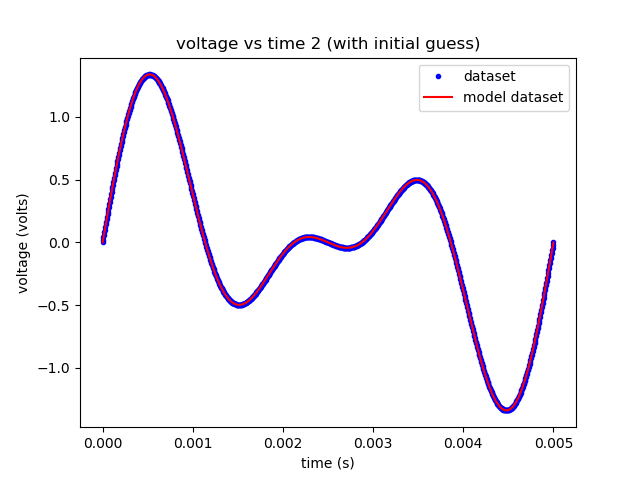

In [10]:
p0 = [(2*np.pi)/.005, 1, 1, 1, 1]

parameters, test = curve_fit(voltfunc, time, voltage, p0)
print(parameters)

model = voltfunc(time, *parameters)

plt.figure()
plt.title('voltage vs time 2 (with initial guess)')
plt.xlabel('time (s)')
plt.ylabel('voltage (volts)')
plt.plot(time, voltage,'b.', label = 'dataset')
plt.plot(time, model,'r-', label = 'model dataset')
plt.legend()
plt.show()

### Finally Complete

As you can see in the above graph, the Fourier Series data matches the raw data very well. Since they match very well we have now completed our Fourier Series! Great Job!!